In [13]:
import pandas as pd
import re
import konlpy
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import numpy as np
from tqdm import tqdm
import urllib.request
import warnings
warnings.filterwarnings("ignore")


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-2, 2))

### 1. 데이터 불러오기

In [22]:
df1 = pd.read_csv('data/이낙연_.csv')
df1 = df1.iloc[:10000,:]
df1 = df1.rename(columns={"post": "sentence"})
df1

,sentence,like_count,comment_count,share_count,date
0,"<홍영표 김종민 신동근 의원님 지지선언, 힘이 솟습니다>\n더불어민주당 홍영표, 김...",636,224,224,2021-09-16
1,<윤석열씨의 대책없는 노동관>\n“손발로 하는 노동은 인도도 안 하고 아프리카나 한...,633,413,264,2021-09-16
2,"<광주시민께 드리는 글 - 민주당이 승리하도록, 결선투표를 만들어주십시오>\n존경...",1.3K,817,450,2021-09-16
3,<정치인의 망발을 언제까지 견뎌야 합니까>\n어제 국회 본회의 대정부질문에서 국민의...,1.7K,534,482,2021-09-15
4,"<역사의 순간, 역사적인 선택에 참여해주십시오>\n더불어민주당의 대선후보를 선출하는...",1.1K,408,330,2021-09-14
...,...,...,...,...,...
609,"8월 7~8일 큰 수해를 당한 전북 남원, 전남 곡성 구례, 경남 하동 화개장터. ...",2K,145,132,2020-9-19
610,서울 종로구 통인시장. 국내외 관광객과 손님들로 붐비던 곳. 코로나19로 한산해졌습...,2.8K,210,116,2020-9-18
611,저희 더불어민주당 소속 오영환 국회의원의 미담이 한 달 만에 세상에 알려졌습니다.\...,3.7K,177,163,2020-9-17
612,국내 제약기업 셀트리온이 코로나19 항체치료제 9만명분 생산체제를 갖춘다고 합니다....,2.2K,188,114,2020-9-17


In [23]:
df2 = pd.read_csv('data/이재명_.csv')
df2 = df2.iloc[:10000,:]
df2 = df2.rename(columns={"post": "sentence"})
df2

,sentence,like_count,comment_count,share_count,date
0,<'임금체불 근절' 노동자의 시름을 덜어드리겠습니다>\n민족의 대명절인 한가위가 며...,1.3K,113,163,2021-09-16
1,"<세계 7번째 SLBM 성공, 자주국방 실현에 성큼 다가선 쾌거>\n오늘 우리 해군...",2K,159,176,2021-09-15
2,"- 제3차 경기도 재난기본소득 지급 관련 경기도지사 기자회견 - \n<10월 1일,...",2.6K,207,187,2021-09-15
3,"<기본소득의 수혜자가 ‘전 국민’인 이유, 추가답변 드립니다>\n어제 이낙연 후보님...",5.1K,503,473,2021-09-15
4,<벼랑 끝에 선 심정을 헤아려야 합니다.>\n안타까운 소식들이 연이어 들려옵니다. ...,1.5K,127,76,2021-09-15
...,...,...,...,...,...
704,<공수처법 개정안 발의를 환영합니다>\n어제 백혜련 의원님께서 '공수처법 개정안'을...,4.2K,398,247,2020-9-15
705,"<어려운 결단 하신 이용섭 광주시장님>\n광역시도 통합은 역내 균형발전, 공무원 수...",1.4K,65,47,2020-9-15
706,<9/15 0시 기준 경기도 코로나19 발생 현황> \n○ 확진자 현황 (경기도 ...,643,22,11,2020-9-15
707,<조선일보 기사 수준이 왜 이럽니까?>\n명색이 전통있는 중앙일간지라는 조선일보가 ...,3.7K,458,201,2020-9-15


In [24]:
df3 = pd.read_csv('data/정세균_.csv')
df3 = df3.iloc[:10000,:]
df3 = df3.rename(columns={"post": "sentence"})
df3

,sentence,like_count,comment_count,share_count,date
0,"존경하는 국민 여러분, \n민주당 당원동지 여러분,\n부족한 저를 오랫동안 성원해주...",2.4K,551,150,2021-9-13
1,"윤석열, 최재형 후보가 공수처의 윤석열 ‘고발 사주’ 수사를 불법 대선 개입으로 규...",491,35,96,2021-09-13
2,지지해 주신 당원동지와 국민께 \n진심으로 감사드립니다.\n여러분의 선택을 겸허하게...,575,97,61,2021-9-12
3,이재명 후보도 홍준표 후보도 품격을 지키십시오.\n차기 대통령을 선출하는 선거입니다...,394,124,54,2021-9-12
4,‘공작’은 은밀히 벌이는 일입니다. 동네방네 소문내며 벌이는 공작은 없습니다. \n...,305,23,69,2021-09-12
...,...,...,...,...,...
319,사람 사는 세상은\n함께 사는 세상입니다.\n모두 어려운 시절입니다.\n지친 마음 ...,590,31,28,2021-4-25
320,기다려왔던 기쁜 소식입니다.\n국민이 함께하면 \n반드시 코로나는 극복할 수 있습니...,304,5,5,2021-4-24
321,"[KTV LIVE] ""전국적 대유행 중대기로, 못 막으면 3단계 격상 검토"" \n정...",355,175,42,2020-8-18
322,생활 속 거리두기 시행 첫날입니다. \n새로운 일상에 대한 기대와 혹시 모를 위험에...,531,50,11,2020-5-6


In [26]:
df4 = pd.read_csv('data/추미애_.csv')
df4 = df4.iloc[:10000,:]
df4 = df4.rename(columns={"post": "sentence"})
df4

,sentence,like_count,comment_count,share_count,date
0,[오늘의 추미애],798,72,25,2021-09-16
1,빙의 돼부렀소 ! 어쩌야쓰까 브루다이야님 ~~~\n( 자식을 여섯이나 낳아 다 기르...,2.6K,160,76,2021-09-16
2,16일(목) 추미애 후보 광주 오후일정\n■오후3시 \n빚고을시민햇빛발전소 협동조합...,770,62,20,2021-09-16
3,윤석열이 검찰총장으로서 조직을 사유화해 정치에 노골적으로 개입한 윤석열의 난에 그 ...,5.6K,224,821,2021-09-16
4,"존경하는 국민 여러분, 광주시민과 전남도민 여러분!\n지난 7월 첫 번째 지역일정으...",3.1K,219,257,2021-09-16
...,...,...,...,...,...
396,개혁을 바라는 민주시민에 맞서 검찰과 언론이 반개혁 동맹전선을 형성하고 있습니다. ...,5.1K,568,332,2020-7-16
397,문제 언론이 계속 문제성 보도를 합니다. 대단합니다. 관음증 보도에 대한 답변이 이...,4.6K,415,116,2020-7-16
398,여성 장관에 대한 언론의 관음 증세가 심각합니다. 연가를 내고 산사로 간 첫날(7월...,7.4K,1.1K,719,2020-7-14
399,회전문식 엉터리 보도관행을 고발합니다. \n장관이 공개를 목적으로 직접 작성해서 ...,3.3K,353,218,2020-7-13


In [28]:
df5 = pd.read_csv('data/유승민_.csv')
df5 = df5.iloc[:10000,:]
df5 = df5.rename(columns={"post": "sentence"})
df5

,sentence,like_count,comment_count,share_count,date
0,"< 유승민의 약속: 자영업자 손실보상, 강하고 현실적인 해법을 약속합니다 > \n...",127,17,25,2021-09-16
1,[희망캠프에서 알려드립니다]\n유승민 대선 예비후보는 오늘(16일) 국민의힘 대선후...,120,17,14,2021-09-16
2,"< 윤석열 후보님, 중문학과 장동원 학생의 질문에 답해주세요 >\n윤석열 후보님, ...",414,57,35,2021-09-16
3,< 어젯밤 인스타 라방에서의 소중한 말씀들... >\n어젯밤 두번째 인스타 라방을 ...,277,40,43,2021-09-16
4,[희망캠프에서 알려드립니다]\n유승민 예비후보의 9월 16일(목) 일정 안내드립니다...,149,32,10,2021-09-15
...,...,...,...,...,...
429,국군의날입니다.\n제 지역구인 대구 동구 K2 공군기지에서 열리는 국군의날 행사로 ...,686,60,17,2019-10-1
430,"대통령의 협박을 이겨내라.\n그게 진정한 검찰개혁이다!\n오늘 문재인 대통령은 ""검...",1.4K,830,81,2019-9-27
431,당신들은 북한의 보훈처냐?\n하재헌 중사는 2015년 8월 4일 북한이 DMZ 수색...,1.3K,300,90,2019-9-17
432,"국민을 우롱하는 대통령의 난치성 자화자찬\n문재인 대통령은 오늘 ""우리 경제가 어려...",1.3K,293,79,2019-9-16


In [29]:
df6 = pd.read_csv('data/윤석열_.csv')
df6 = df6.iloc[:10000,:]
df6 = df6.rename(columns={"post": "sentence"})
df6

,sentence,like_count,comment_count,share_count,date
0,북한은 지난 주말 순항미사일을 발사한데 이어 오늘 다시 탄도미사일로 추정되는 무력시...,1.8K,568,87,2021-09-15
1,"존경하는 국민여러분, \n그리고 당원동지 여러분\n국민의힘 대선 예비후보 윤석열입니...",4.4K,1.4K,281,2021-09-15
2,"선비정신과 충절의 고장, 안동이 백신산업의 요람이자 바이오산업 도시로 떠오르고 있습...",2.4K,630,141,2021-09-14
3,"상상23 청년 세미나 ‘청년, 희망을 해킹하라’에 참석해 청년들의 정책을 귀담아들었...",2.8K,685,159,2021-09-13
4,"소상공인 여러분들! 안정적으로 사실 수 있도록\n정권교체, 경제살리기 반드시 해내겠...",1.8K,840,143,2021-09-10
...,...,...,...,...,...
80,오늘 국민 기자회견 사진도 공유합니다.,6.5K,398,61,2021-6-29
81,오늘 국민 여러분께 말씀드린 \n<윤석열 국민 기자회견문> 전문을 올립니다.\n--...,6.4K,420,107,2021-6-29
82,"안녕하세요\n국민 여러분, 그리고 페친 여러분! \n여러분께 더 가까이 다가가고\n...",6.8K,910,81,2021-6-29
83,No post text,5K,176,15,2021-6-29


In [30]:
df7 = pd.read_csv('data/홍준표_.csv')
df7 = df7.iloc[:10000,:]
df7 = df7.rename(columns={"post": "sentence"})
df7

,sentence,like_count,comment_count,share_count,date
0,-조사개요-\n조사의뢰 : 뉴스토마토\n조사기관 : 미디어토마토\n조사일시 : 20...,776,51,48,2021-09-16
1,추석 민심이 지나면 더 기울어 질겁니다.,1.2K,39,62,2021-09-16
2,jp희망 편지 23 \n자영업자.소상공인 분들의 극단적인 선택이 줄을 잇는 비극적인...,898,35,70,2021-09-16
3,당에서 공명선거 추진단을 만들어 놓고\n특정후보 옹호나 하면서\n그 후보측에서 경쟁...,1.4K,49,49,2021-09-15
4,서울대 사회과학대 학생회 초청으로 특강을 가서 10분 기조발제 하고 1시간 20분 ...,1.1K,41,53,2021-09-15
...,...,...,...,...,...
457,어머님 산소에 왔습니다.\n경남지사때는 매달 왔는데 서울로 올라가고 나서는 드문드문...,2.9K,60,46,2020-9-20
458,요즘 유행하는 아바타 사진 입니다.\n좌측은 접니다만 우측은 누구인지 한번 맞추어 ...,1.9K,123,41,2020-9-17
459,요즘은 출근하면 나랏일 보다가 쉴때는 40여년 전 대학시절에 읽었던 이병주 선생의 ...,1.4K,50,41,2020-9-17
460,오늘 서욱 국방부 장관 내정자 인사 청문회에서 서욱 후보자로부터 \n한미일 자유주의...,1.4K,63,41,2020-9-16


In [31]:
df8 = pd.read_csv('data/황교안_.csv')
df8 = df8.iloc[:10000,:]
df8 = df8.rename(columns={"post": "sentence"})
df8

,sentence,like_count,comment_count,share_count,date
0,No post text,96,9,7,2021-08-02
1,<故조용기 목사님을 추모합니다>\n주님의 종이 하나님의 부름을 받으셨습니다. 이 땅...,826,70,22,2021-09-15
2,<‘깜놀 10억 벤처창업 배틀’로 스타트업 강국을 실현하겠습니다>\n오늘 판교 테크...,479,55,25,2021-9-14
3,<‘깜놀 10억 벤처창업 배틀’로 스타트업 강국을 실현하겠습니다>\n오늘 판교밸리에...,465,72,31,2021-9-14
4,<이래도 되는 겁니까?>\n서울시가 10년간 1조 가까운 시민혈세를 시민단체에게 비...,1.1K,112,79,2021-9-14
...,...,...,...,...,...
205,백의종군 첫 행선지로 부산을 찾았습니다. \n'국민 속으로'는 제가 <민생대장정> ...,985,339,67,2021-3-11
206,‘야만의 정치’를 끝내야 합니다.\n ‘개와 늑대의 시간’은 지났습니다. 우리는 그...,1.5K,363,107,2021-3-10
207,‘적반하장’도 유분수다. \n여권의 '정치검사 윤석열' 운운은 정말 뻔뻔한 주장이다...,1.6K,346,94,2021-3-7
208,도무지 끝날 것 같지 않던 겨울이 어김없이 물러나고 있습니다. 드디어 매화향이 그윽...,1.5K,223,106,2021-3-4


In [32]:
### 리스트에 데이터 넣어주기
data=[df1,df2,df3,df4,df5,df6,df7,df8]
num=8

In [33]:
###감성사전      (KNU 한국어 감성사전)   https://github.com/park1200656/KnuSentiLex
sent_dic = pd.read_csv('data/SentiWord_Dict.txt',sep = '\t',header=None)
sent_dic.iloc[14850,0]='갈등'

pos_dic = sent_dic[sent_dic[1]>0]
neg_dic = sent_dic[sent_dic[1]<0]
neu_dic = sent_dic[sent_dic[1]==0]

### 2. 텍스트 전처리 

In [34]:
okt = konlpy.tag.Okt()

def text_preprocess(x):
    text=[]
    a = re.sub('[^가-힣0-9a-zA-Z\\s]', '',x)
    for j in a.split():
        text.append(j)
    return ' '.join(text)

def tokenize(x):
    text = []
    tokens = okt.pos(x)
    for token in tokens :
        if token[1] == 'Adjective' or token[1]=='Adverb' or token[1] == 'Determiner' or token[1] == 'Noun' or token[1] == 'Verb' or 'Unknown':
            text.append(token[0])
    return text

In [35]:
tqdm.pandas()
for df in data:
    df['comment'] = df['sentence'].apply(lambda x : text_preprocess(x))
    df['comment'] = df['comment'].progress_apply(lambda x: tokenize(x))

100%|████████████████████████████████████████████████████████████████████████████████| 210/210 [00:05<00:00, 41.84it/s]


### 3. 단어별 감성지수 측정 및 감성사전 업데이트

In [36]:
def make_sent_dict(x) :
    pos=[]
    neg=[]
    tmp={}
    
    for sentence in tqdm(x):
        for word in sentence :
            target = sent_dic[sent_dic[0]==word]
            if len(target)==1: # 기존에 있는 단어라면 그대로 사용
                score = float(target[1])
                if score > 0:
                    pos.append(word)
                elif score < 0:
                    neg.append(word)                
            tmp[word] = {'W':0,'WP':0,'WN':0} # 감성사전 구성
    pos = list(set(pos))
    neg = list(set(neg))
    
    for sentence in tqdm(x):
        for word in sentence :
            tmp[word]['W'] += 1 # 빈도 수
            for po in pos :
                if po in sentence:
                    tmp[word]['WP'] += 1 # 긍정단어과 같은 문장 내 단어일 때
                    break
            for ne in neg:
                if ne in sentence:
                    tmp[word]['WN'] += 1 # 부정단어와 같은 문장내 단어일 때
                    break
    return pos, neg, pd.DataFrame(tmp)

In [37]:
def make_score_dict(d,p,n):
    N=sum(d.iloc[0,::])
    pos_cnt=sum(d.loc[::,p].iloc[0,::])
    neg_cnt=sum(d.loc[::,n].iloc[0,::])
    
    trans =d.T
    trans['neg_cnt']=neg_cnt
    trans['pos_cnt']=pos_cnt
    trans['N']=N

    trans['MI_P']=np.log2(trans['WP']*trans['N']/trans['W']*trans['pos_cnt'])
    trans['MI_N']=np.log2(trans['WN']*trans['N']/trans['W']*trans['neg_cnt'])
    trans['SO_MI']=trans['MI_P'] - trans['MI_N']
    
    trans = trans.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
    trans = trans.sort_values(by=['SO_MI'],ascending=False)
    return trans

In [38]:
def update_dict(d, add_dict):
    add_Dic = {0:[],1:[]}
    for i in d.T.items():
        if i[0] not in list(sent_dic[0]):
            if len(i[0]) > 1:
                add_Dic[0].append(i[0])
                add_Dic[1].append(i[1]['SO_MI'])
            
    add_Dic=pd.DataFrame(add_Dic)
    new=pd.merge(add_dict,add_Dic,'outer')
    return new

In [39]:
add_dict=sent_dic.copy()
for df in data:
    pos=[]
    neg=[]
    new_dict=pd.DataFrame()
    t_dict=pd.DataFrame()
    
    pos, neg, new_dict = make_sent_dict(df['comment'].values)
    t_dict = make_score_dict(new_dict,pos,neg)
    t_dict['SO_MI'] = scaler.fit_transform(t_dict['SO_MI'].values.reshape(-1,1))
    add_dict=update_dict(t_dict, add_dict)
add_dict

100%|████████████████████████████████████████████████████████████████████████████████| 210/210 [00:15<00:00, 13.94it/s]


,0,1
0,(-;,1.00000
1,(;_;),-1.00000
2,(^^),1.00000
3,(^-^),1.00000
4,(^^*,1.00000
...,...,...
89349,광복회,-1.18482
89350,김영삼,-1.18482
89351,예산,-1.36611
89352,했는데,-1.78558


### 4. 문장 감성분석

In [40]:
def get_cnt(x):
    cnt = 0
    for word in list(set(x)):
        target = add_dict[add_dict[0]==word]
        if len(target)==1:
            cnt += float(target[1])
    return cnt

def get_ratio(x):
    score = x['score']
    length = np.log10(len(x['comment']))+1
    try:
        ratio= round(score/length,2)
    except:
        ratio = 0
    return ratio

In [41]:
tqdm.pandas()
for df in data:
    df['score']= df['comment'].progress_apply(lambda x : get_cnt(x))
    df['ratio'] = df.apply(lambda x: get_ratio(x), axis = 1)

100%|████████████████████████████████████████████████████████████████████████████████| 210/210 [02:53<00:00,  1.21it/s]


### 날짜 데이터 변환

In [45]:
import datetime as dt

In [88]:
for df in data:
    for i in range(len(df)):
        tmp = df['date'][i]
        if type(tmp) == str:
            try:
                year= int(tmp.split('-')[0])
                month= int(tmp.split('-')[1])
                day= int(tmp.split('-')[2])
                hour= 0
                df['date'][i] = dt.datetime(year, month, day, hour)
            except (ValueError):
                df['date'][i] = df['date'][i-1]
        else : 
            pass

### 5. 키워드별 보기

In [134]:
word_list=['백신','부동산','북한','재난지원금','국민지원금','청년','문재인','윤석열','이준석','이재명','복지','접종','노조','기업']
for word in word_list:
    for df in data:
        for i in range(len(df)):
            tmp=df.loc[i,'sentence']
            flag=False
            if word in tmp:
                flag=True
            if flag:
                df.loc[i,str(word)]=True

### 6. 시각화   
##### 1.이낙연   2.이재명   3. 정세균   4.추미애   5.유승민   6.윤석열   7.홍준표  8.황교안   순서   


Text(0.5, 1.0, '백신')

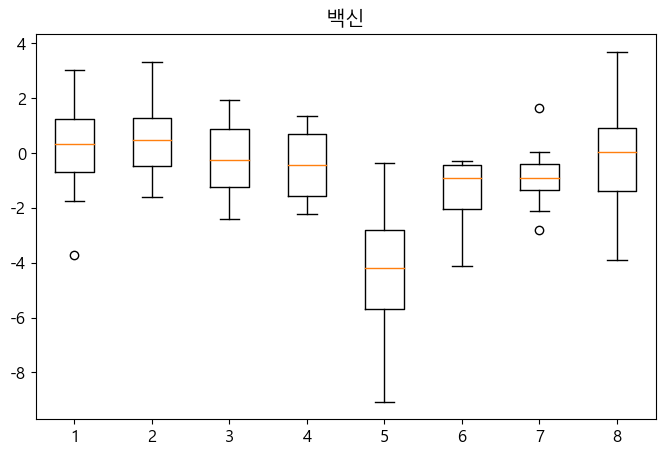

In [90]:
word="백신"
plt.style.use('default')
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

plt.boxplot([df1[df1[word]==True]['ratio'].dropna(),
             df2[df2[word]==True]['ratio'].dropna(),
             df3[df3[word]==True]['ratio'].dropna(),
             df4[df4[word]==True]['ratio'].dropna(),
             df5[df5[word]==True]['ratio'].dropna(),
             df6[df6[word]==True]['ratio'].dropna(),
             df7[df7[word]==True]['ratio'].dropna(),
             df8[df8[word]==True]['ratio'].dropna()
             ]);
plt.title(word)

Text(0.5, 1.0, '부동산')

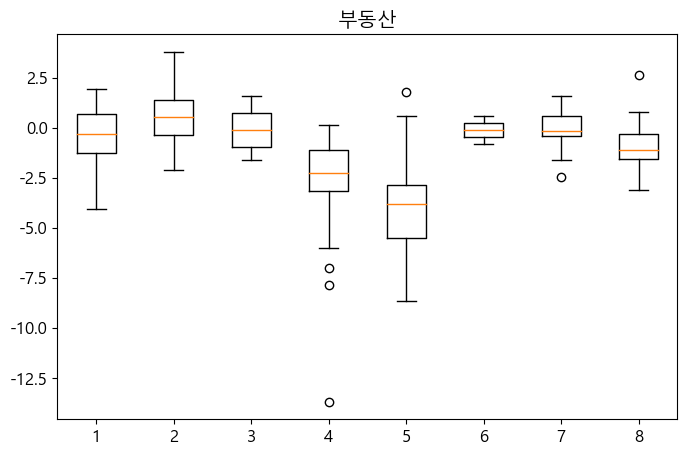

In [91]:
word="부동산"
plt.style.use('default')
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

plt.boxplot([df1[df1[word]==True]['ratio'].dropna(),
             df2[df2[word]==True]['ratio'].dropna(),
             df3[df3[word]==True]['ratio'].dropna(),
             df4[df4[word]==True]['ratio'].dropna(),
             df5[df5[word]==True]['ratio'].dropna(),
             df6[df6[word]==True]['ratio'].dropna(),
             df7[df7[word]==True]['ratio'].dropna(),
             df8[df8[word]==True]['ratio'].dropna()
             ]);
plt.title(word)

Text(0.5, 1.0, '북한')

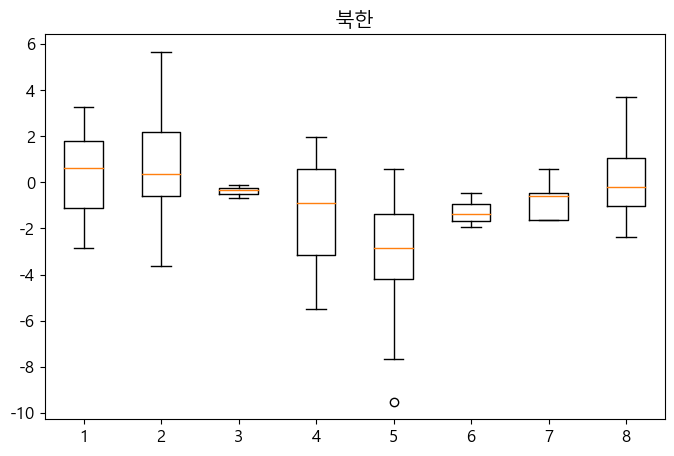

In [92]:
word="북한"
plt.style.use('default')
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

plt.boxplot([df1[df1[word]==True]['ratio'].dropna(),
             df2[df2[word]==True]['ratio'].dropna(),
             df3[df3[word]==True]['ratio'].dropna(),
             df4[df4[word]==True]['ratio'].dropna(),
             df5[df5[word]==True]['ratio'].dropna(),
             df6[df6[word]==True]['ratio'].dropna(),
             df7[df7[word]==True]['ratio'].dropna(),
             df8[df8[word]==True]['ratio'].dropna()
             ]);
plt.title(word)

Text(0.5, 1.0, '재난지원금')

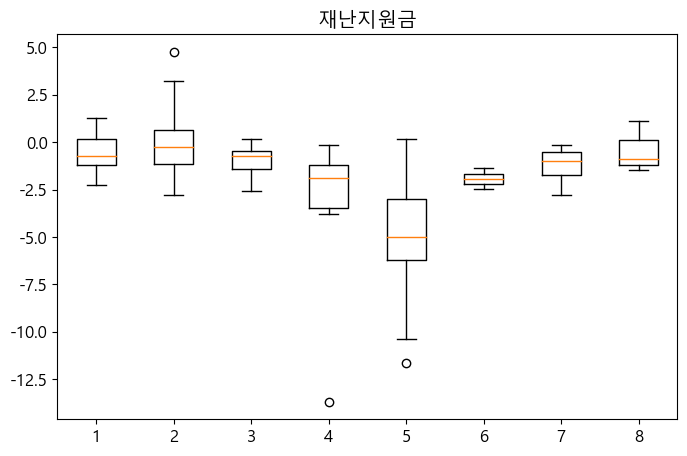

In [93]:
word="재난지원금"
plt.style.use('default')
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

plt.boxplot([df1[df1[word]==True]['ratio'].dropna(),
             df2[df2[word]==True]['ratio'].dropna(),
             df3[df3[word]==True]['ratio'].dropna(),
             df4[df4[word]==True]['ratio'].dropna(),
             df5[df5[word]==True]['ratio'].dropna(),
             df6[df6[word]==True]['ratio'].dropna(),
             df7[df7[word]==True]['ratio'].dropna(),
             df8[df8[word]==True]['ratio'].dropna()
             ]);
plt.title(word)

Text(0.5, 1.0, '청년')

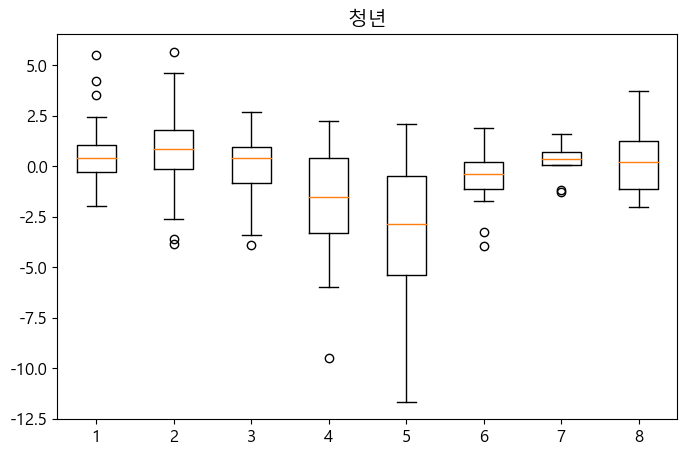

In [94]:
word="청년"
plt.style.use('default')
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

plt.boxplot([df1[df1[word]==True]['ratio'].dropna(),
             df2[df2[word]==True]['ratio'].dropna(),
             df3[df3[word]==True]['ratio'].dropna(),
             df4[df4[word]==True]['ratio'].dropna(),
             df5[df5[word]==True]['ratio'].dropna(),
             df6[df6[word]==True]['ratio'].dropna(),
             df7[df7[word]==True]['ratio'].dropna(),
             df8[df8[word]==True]['ratio'].dropna()
             ]);
plt.title(word)

Text(0.5, 1.0, '문재인')

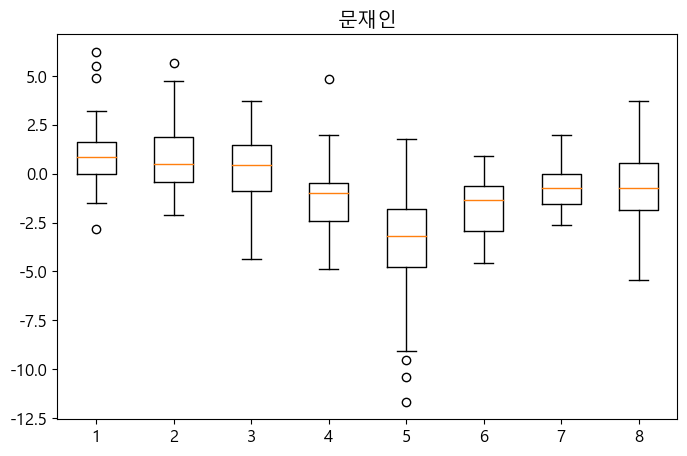

In [95]:
word="문재인"
plt.style.use('default')
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

plt.boxplot([df1[df1[word]==True]['ratio'].dropna(),
             df2[df2[word]==True]['ratio'].dropna(),
             df3[df3[word]==True]['ratio'].dropna(),
             df4[df4[word]==True]['ratio'].dropna(),
             df5[df5[word]==True]['ratio'].dropna(),
             df6[df6[word]==True]['ratio'].dropna(),
             df7[df7[word]==True]['ratio'].dropna(),
             df8[df8[word]==True]['ratio'].dropna()
             ]);
plt.title(word)

Text(0.5, 1.0, '윤석열')

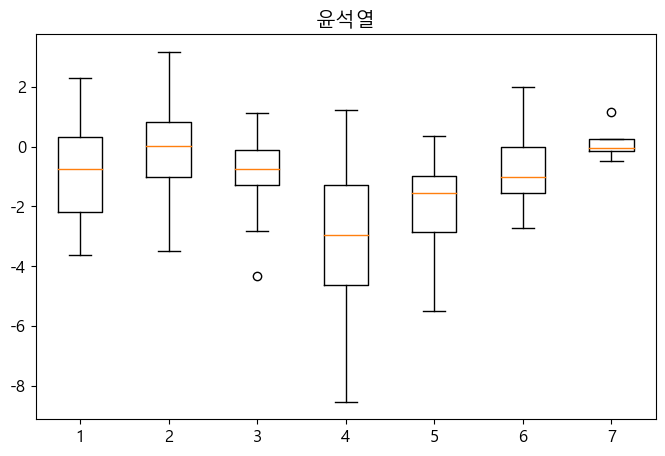

In [96]:
word="윤석열"
plt.style.use('default')
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

plt.boxplot([df1[df1[word]==True]['ratio'].dropna(),
             df2[df2[word]==True]['ratio'].dropna(),
             df3[df3[word]==True]['ratio'].dropna(),
             df4[df4[word]==True]['ratio'].dropna(),
             df5[df5[word]==True]['ratio'].dropna(),
             #df6[df6[word]==True]['ratio'].dropna(),
             df7[df7[word]==True]['ratio'].dropna(),
             df8[df8[word]==True]['ratio'].dropna()
             ]);
plt.title(word)

Text(0.5, 1.0, '이준석')

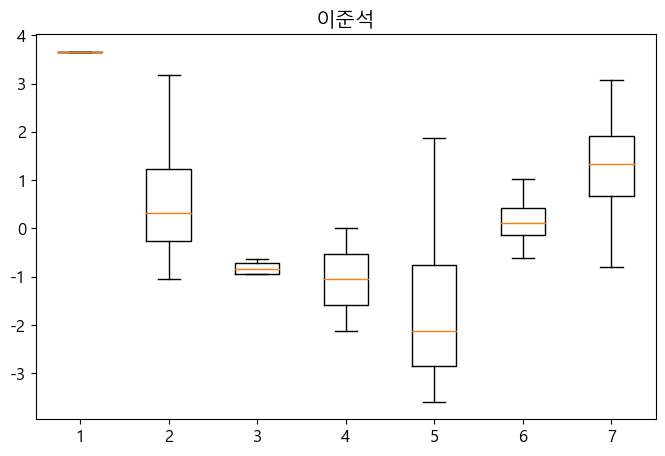

In [97]:
word="이준석"
plt.style.use('default')
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

plt.boxplot([df1[df1[word]==True]['ratio'].dropna(),
             df2[df2[word]==True]['ratio'].dropna(),
             df3[df3[word]==True]['ratio'].dropna(),
             df4[df4[word]==True]['ratio'].dropna(),
             df5[df5[word]==True]['ratio'].dropna(),
             #df6[df6[word]==True]['ratio'].dropna(),
             df7[df7[word]==True]['ratio'].dropna(),
             df8[df8[word]==True]['ratio'].dropna()
             ]);
plt.title(word)

Text(0.5, 1.0, '이재명')

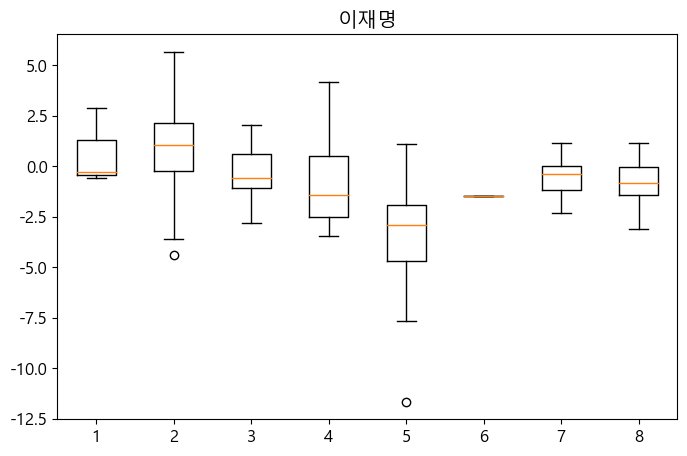

In [98]:
word="이재명"
plt.style.use('default')
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

plt.boxplot([df1[df1[word]==True]['ratio'].dropna(),
             df2[df2[word]==True]['ratio'].dropna(),
             df3[df3[word]==True]['ratio'].dropna(),
             df4[df4[word]==True]['ratio'].dropna(),
             df5[df5[word]==True]['ratio'].dropna(),
             df6[df6[word]==True]['ratio'].dropna(),
             df7[df7[word]==True]['ratio'].dropna(),
             df8[df8[word]==True]['ratio'].dropna()
             ]);
plt.title(word)

Text(0.5, 1.0, '복지')

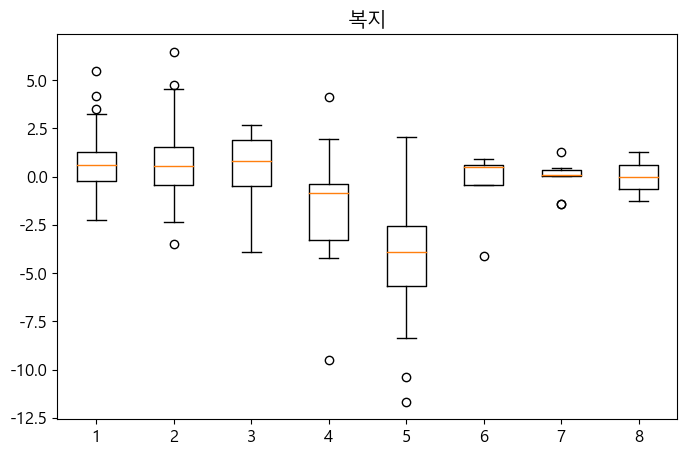

In [99]:
word="복지"
plt.style.use('default')
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

plt.boxplot([df1[df1[word]==True]['ratio'].dropna(),
             df2[df2[word]==True]['ratio'].dropna(),
             df3[df3[word]==True]['ratio'].dropna(),
             df4[df4[word]==True]['ratio'].dropna(),
             df5[df5[word]==True]['ratio'].dropna(),
             df6[df6[word]==True]['ratio'].dropna(),
             df7[df7[word]==True]['ratio'].dropna(),
             df8[df8[word]==True]['ratio'].dropna()
             ]);
plt.title(word)

Text(0.5, 1.0, '접종')

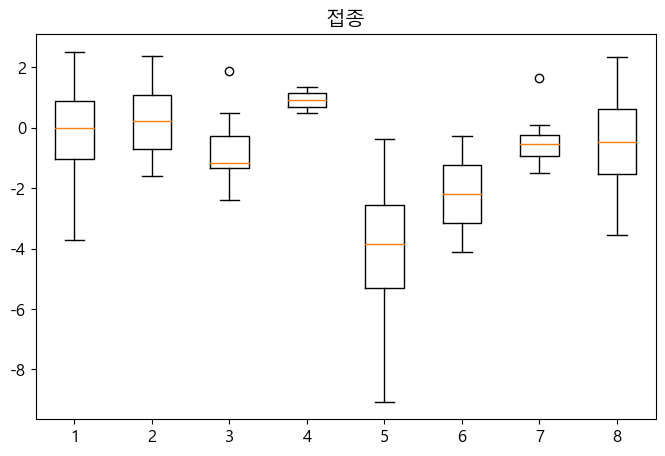

In [100]:
word="접종"
plt.style.use('default')
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

plt.boxplot([df1[df1[word]==True]['ratio'].dropna(),
             df2[df2[word]==True]['ratio'].dropna(),
             df3[df3[word]==True]['ratio'].dropna(),
             df4[df4[word]==True]['ratio'].dropna(),
             df5[df5[word]==True]['ratio'].dropna(),
             df6[df6[word]==True]['ratio'].dropna(),
             df7[df7[word]==True]['ratio'].dropna(),
             df8[df8[word]==True]['ratio'].dropna()
             ]);
plt.title(word)

Text(0.5, 1.0, '노조')

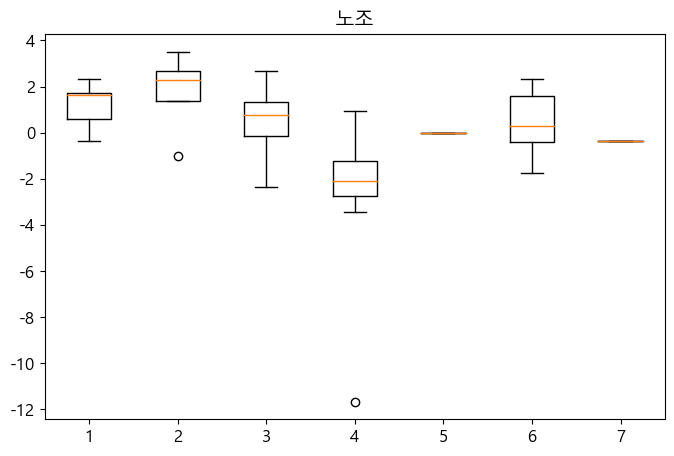

In [101]:
word="노조"
plt.style.use('default')
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

plt.boxplot([df1[df1[word]==True]['ratio'].dropna(),
             df2[df2[word]==True]['ratio'].dropna(),
             df3[df3[word]==True]['ratio'].dropna(),
             #df4[df4[word]==True]['ratio'].dropna(),
             df5[df5[word]==True]['ratio'].dropna(),
             df6[df6[word]==True]['ratio'].dropna(),
             df7[df7[word]==True]['ratio'].dropna(),
             df8[df8[word]==True]['ratio'].dropna()
             ]);
plt.title(word)

In [104]:
blue=[df1,df2,df3,df4]  #여당
red=[df5,df6,df7,df8]   #야당

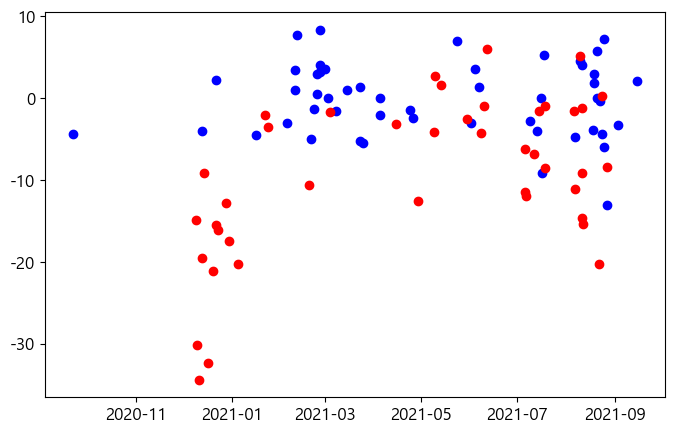

In [111]:
for df in blue:
    plt.scatter(df[df['접종']==True]['date'],df[df['접종']==True]['score'], color='blue')
for df in red:
    plt.scatter(df[df['접종']==True]['date'],df[df['접종']==True]['score'], color='red')

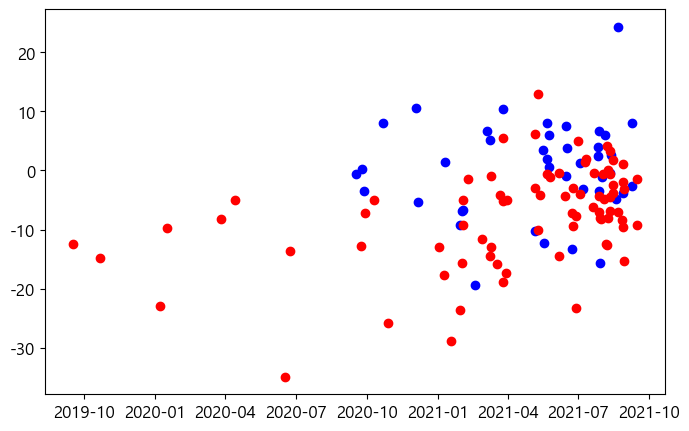

In [112]:
for df in blue:
    plt.scatter(df[df['북한']==True]['date'],df[df['북한']==True]['score'], color='blue')
for df in red:
    plt.scatter(df[df['북한']==True]['date'],df[df['북한']==True]['score'], color='red')

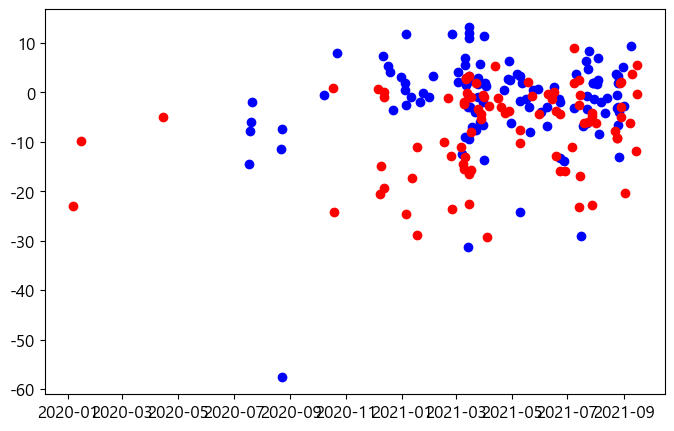

In [115]:
for df in blue:
    plt.scatter(df[df['부동산']==True]['date'],df[df['부동산']==True]['score'], color='blue')
for df in red:
    plt.scatter(df[df['부동산']==True]['date'],df[df['부동산']==True]['score'], color='red')

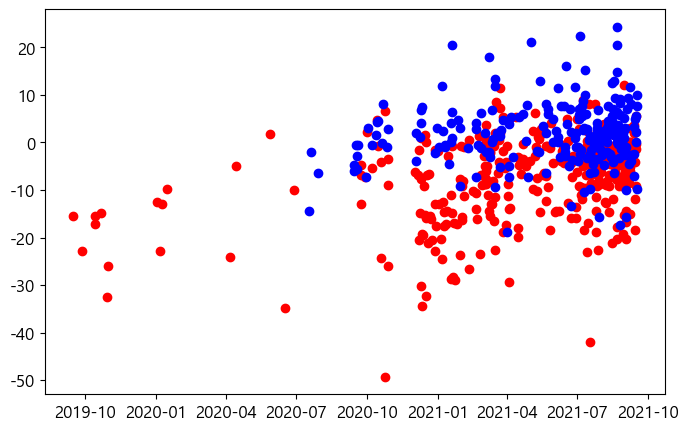

In [119]:
for df in red:
    plt.scatter(df[df['문재인']==True]['date'],df[df['문재인']==True]['score'], color='red')
for df in blue:
    plt.scatter(df[df['문재인']==True]['date'],df[df['문재인']==True]['score'], color='blue')

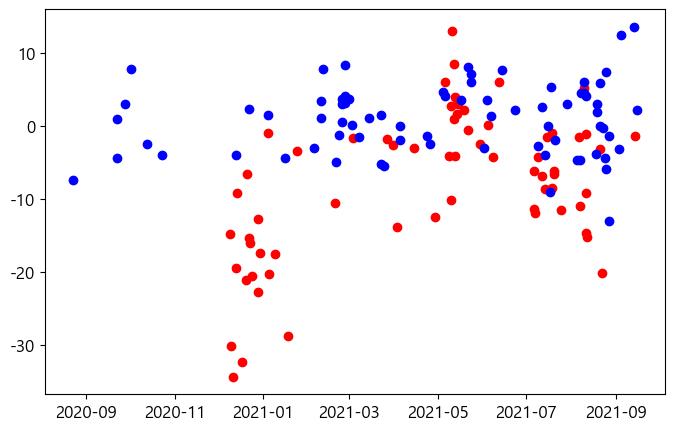

In [122]:
for df in red:
    plt.scatter(df[df['백신']==True]['date'],df[df['백신']==True]['score'], color='red')
for df in blue:
    plt.scatter(df[df['백신']==True]['date'],df[df['백신']==True]['score'], color='blue')

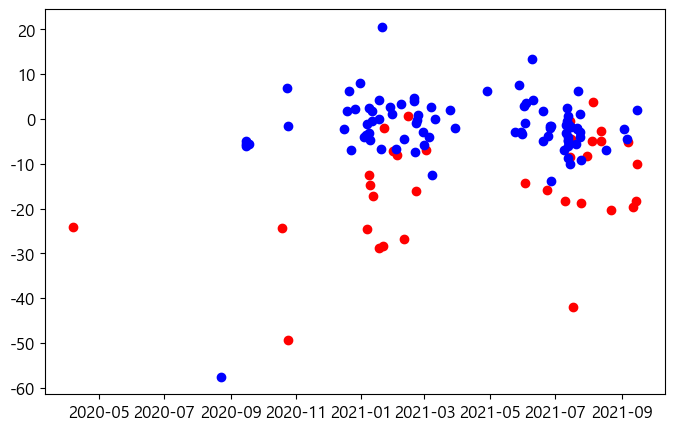

In [130]:
for df in red:
    plt.scatter(df[df['재난지원금']==True]['date'],df[df['재난지원금']==True]['score'], color='red')
for df in blue:
    plt.scatter(df[df['재난지원금']==True]['date'],df[df['재난지원금']==True]['score'], color='blue')

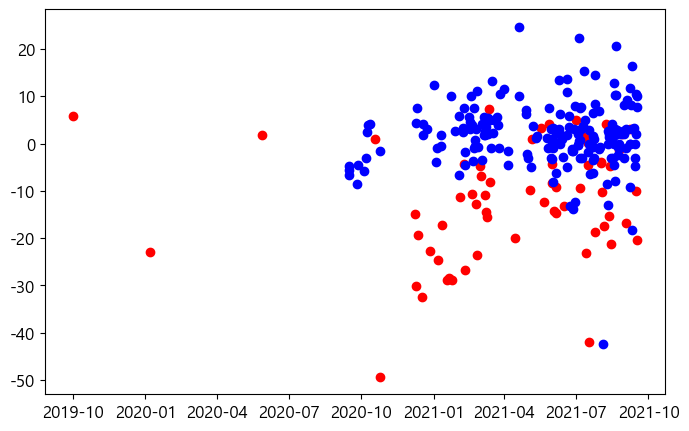

In [131]:
for df in red:
    plt.scatter(df[df['복지']==True]['date'],df[df['복지']==True]['score'], color='red')
for df in blue:
    plt.scatter(df[df['복지']==True]['date'],df[df['복지']==True]['score'], color='blue')

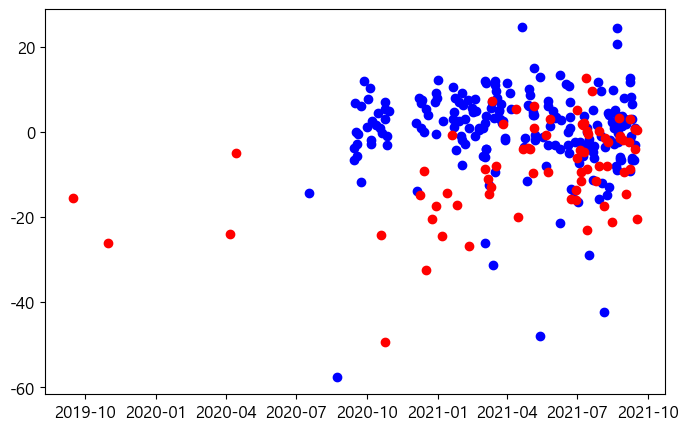

In [137]:
for df in blue:
    plt.scatter(df[df['기업']==True]['date'],df[df['기업']==True]['score'], color='blue')
for df in red:
    plt.scatter(df[df['기업']==True]['date'],df[df['기업']==True]['score'], color='red')
